## Polynomial_Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

Text(0, 0.5, 'y_dataset')

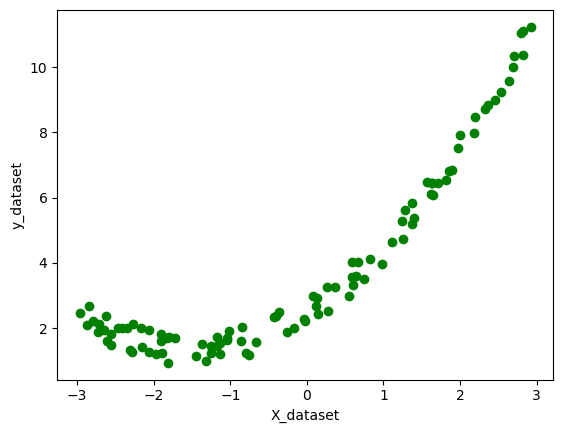

In [18]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)
## quadratic equation used 0.5*x^2 + 1.5*x + 2 +outlier
plt.scatter(X, y, color='g')
plt.xlabel("X_dataset")
plt.ylabel("y_dataset")

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [20]:
## implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(f"R2_score:{score}")

R2_score:0.7981946299885923


Here the linear regression model gives accuracy rate of 79.9 percentage

Text(0, 0.5, 'y_data')

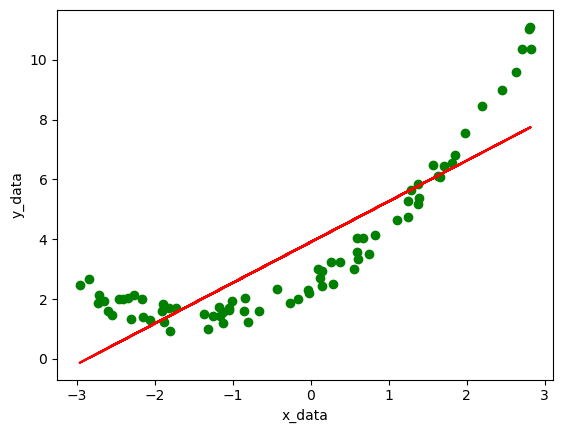

In [22]:
## Visualization of above Model
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train, color = 'g')
plt.xlabel("x_data")
plt.ylabel("y_data")

## Degree 2 polynomial

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

In [24]:
## checking accuracy
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
score = r2_score(y_test, regression.predict(X_test_poly))
print(f"R2_score{score}")


R2_score0.9923887925352182


In [25]:
print(f"coefficient:{regression.coef_}")
print(f"intercept:{regression.intercept_}")

coefficient:[[0.         1.49336704 0.50224949]]
intercept:[2.49433109]


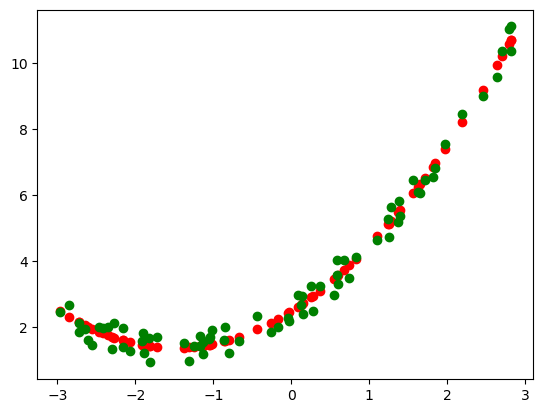

In [26]:
## Visualization
plt.scatter(X_train, regression.predict(X_train_poly), color = 'red')
plt.scatter(X_train, y_train, color = "green")

## Degree 3

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

In [28]:
## checking accuracy
regression_3 = LinearRegression()
regression_3.fit(X_train_poly, y_train)
score = r2_score(y_test, regression_3.predict(X_test_poly))
print(f"R2_score{score}")
print(f"coefficient:{regression_3.coef_}")
print(f"intercept:{regression_3.intercept_}")

R2_score0.9922445440230714
coefficient:[[0.         1.44414389 0.5030907  0.0094051 ]]
intercept:[2.49340879]


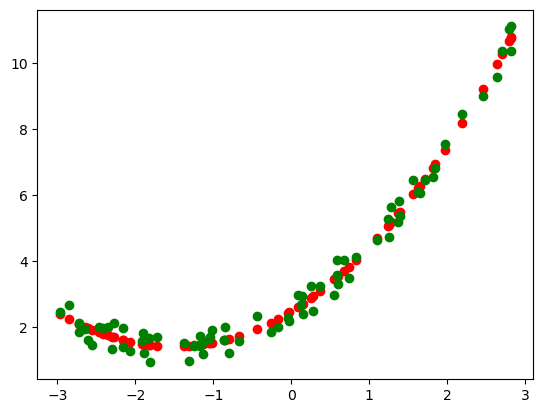

In [30]:
## Visualization
plt.scatter(X_train, regression_3.predict(X_train_poly), color = 'red')
plt.scatter(X_train, y_train, color = "green")

In [15]:
## Prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

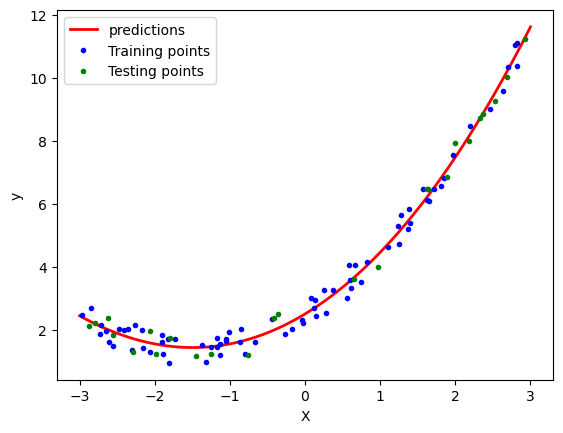

In [31]:
y_new = regression_3.predict(X_new_poly)
plt.plot(X_new,y_new, 'r-', linewidth=2, label= "predictions")
plt.plot(X_train,y_train, 'b.', label = "Training points")
plt.plot(X_test, y_test, 'g.', label = "Testing points")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Pipelining Concept

In [33]:
from sklearn.pipeline import Pipeline

In [41]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree = degree,include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_predict_new = poly_regression.predict(X_new)

    #plotting
    plt.plot(X_new, y_predict_new, color = 'r', label = "Degree" +str(degree), linewidth = 3)
    plt.plot(X_train,y_train, 'b.', linewidth = 3 )
    plt.plot(X_test,y_test, 'g.', linewidth = 3 )
    plt.legend(loc = "upper left")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()

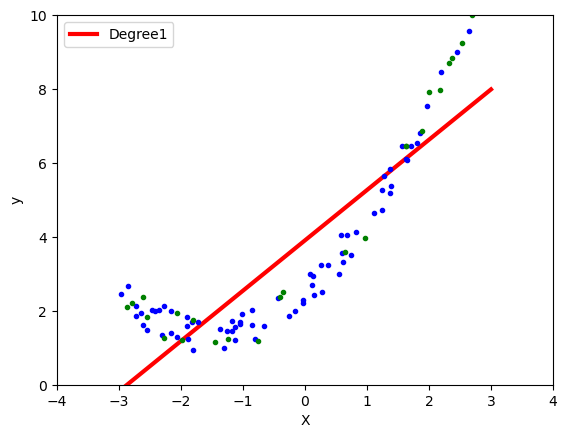

In [44]:
polynomial_regression(1)